In [86]:
library('rlist')
library(DescTools)

# 3
Consider the Gini index, classification error, and cross-entropy in a
simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of $\hat{p}_{m1}$. The xaxis
should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy.

*Hint: In a setting with two classes, $\hat{p}_{m1} = 1− \hat{p}_{m2}$. You could make
this plot by hand, but it will be much easier to make in R.*

In [87]:
p_m1 <- seq(0,1, 0.1)
p_m2 = -p_m1 + 1

# gini index (p.312 - since k is just 2, skip iteration and just add
G <- (p_m1 * (1 - p_m1) 
         + p_m2 * (1 - p_m2))

# classification error (p. 312)
E <- 1 - pmax(p_m1, p_m2)

# cross-entropy (p.312)
D <- -((p_m1 * log(p_m1) 
            + p_m2 * log(p_m2)))

In [88]:
# coeff
Gini(p_m1, p_m2)

[1] 0.525

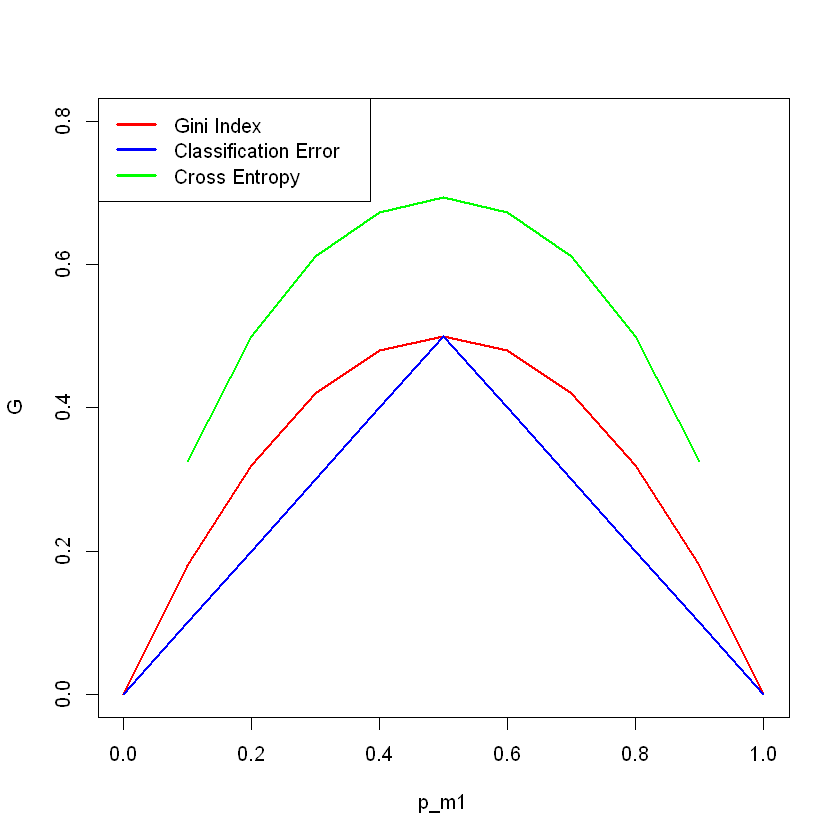

In [89]:
plot(p_m1, G, type = 'l', col='red', lwd=2, ylim = c(0, 0.8))
lines(p_m1, E, type = 'l', col='blue', lwd=2)
lines(p_m1, D, type = 'l', col='green', lwd=2)

legend(
    x='topleft',
    legend=c('Gini Index', 'Classification Error', 'Cross Entropy'), 
    col=c('red', 'blue', 'green'),
    lwd=3
)

# 5

Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?

1. Final classification under majority vote approach is Red
2. Final classificaition under average probability is **not** Red

In [90]:
pred <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)

In [91]:
is_red <- ifelse(pred > 0.5, 1, 0)

In [92]:
#  majority vote: the overall prediction is the most commonly occurring majority class among the B predictions. 
table(is_red)

is_red
0 1 
4 6 

In [93]:
ifelse(mean(pred) > 0.5, 'RED', 'NOT RED')

[1] "NOT RED"

# 7

In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500. 

Create a plot displaying the test
error resulting from random forests on this data set for a more comprehensive
range of values for mtry and ntree. You can model your
plot after Figure 8.10. Describe the results obtained.

- When searching values for `ntree`, the smallest MSE achieved was 18.1 when `ntree=136`
- When searching values for `mtry`, the smallest MSE achieved was ~19 when `mtry=3`

In [214]:
# ref: p.329
library(randomForest)
library(MASS)

set.seed(1)

train = sample (1: nrow(Boston ), nrow(Boston )/2)
test = Boston[-train , "medv"]

In [ ]:
ERR <- c()

# ntree search space
NTREE <- 25:500

for (ntree in NTREE) {
    rf.boston = randomForest(medv~., data=Boston, subset=train, mtry=6, ntree=ntree, importance=TRUE)
    yhat.rf = predict(rf.boston, newdata=Boston[-train ,])

    MSE <- mean((yhat.rf - test)^2)
    ERR <- list.append(ERR, MSE)
} 

In [95]:
min(ERR)

best.ntree <- which(ERR==min(ERR))
best.ntree

[1] 18.10643

[1] 136

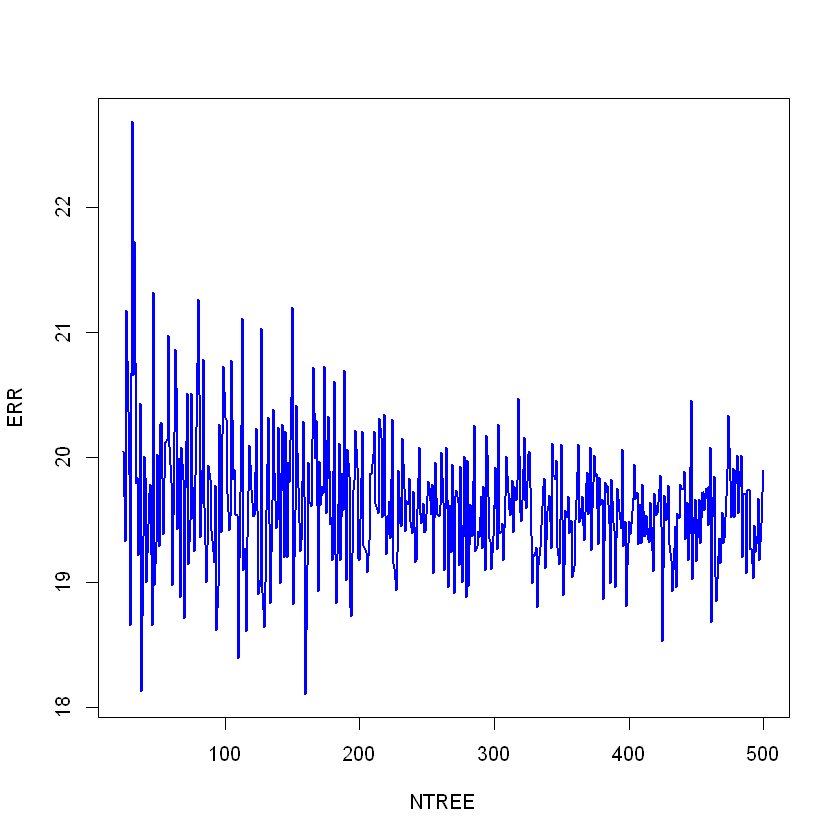

In [96]:
plot(NTREE, ERR, col='blue', lwd=2, type='l')

In [305]:
MTRY <- 1:13
mtry.err = c()

for (mtry in MTRY) {
    rf.boston = randomForest(medv~., data=Boston, subset=train, mtry=mtry, ntree=best.ntree, importance=TRUE)
    yhat.rf = predict(rf.boston, newdata=Boston[-train ,])

    MSE <- mean((yhat.rf - test)^2)
    mtry.err <- list.append(mtry.err, MSE)
}

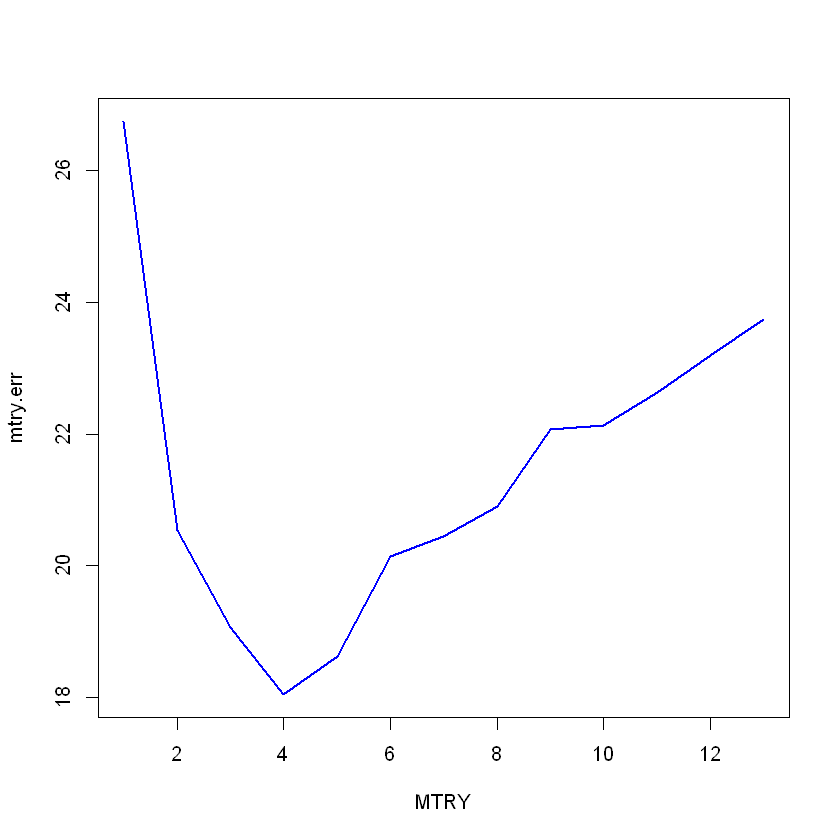

In [293]:
plot(MTRY, mtry.err, col='blue', lwd=2, type='l')

In [295]:
min(mtry.err)
best.mtry <- which(mtry.err==min(mtry.err))
best.mtry

[1] 18.04247

[1] 4

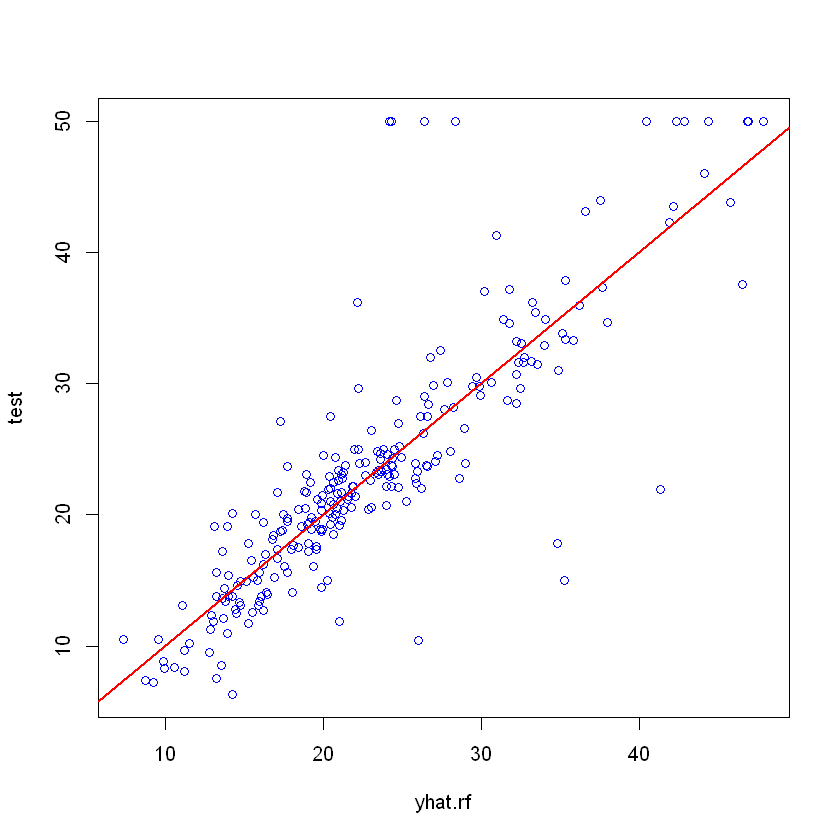

In [296]:
rf.boston = randomForest(medv~., data=Boston, subset=train, mtry=best.mtry, ntree=best.ntree, importance=TRUE)

yhat.bag = predict(rf.boston, newdata=Boston[-train ,])
plot(yhat.rf, test, col='blue')
abline(0,1, col='red', lwd=2)

# 8

In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

### (a) 
Split the data set into a training set and a test set.

In [149]:
# p. 324
library(ISLR)

In [251]:
Carseats <- ISLR::Carseats

In [252]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [253]:
cs.train = sample(nrow(Carseats ), nrow(Carseats )* 0.7)
X_train = Carseats[cs.train, ]
X_test = Carseats[-cs.train, ]
y_test = Carseats$Sales[-cs.train]

### (b) 
Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

- MSE is 3.71

In [256]:
# install.packages('tree')

[1] 3.713476

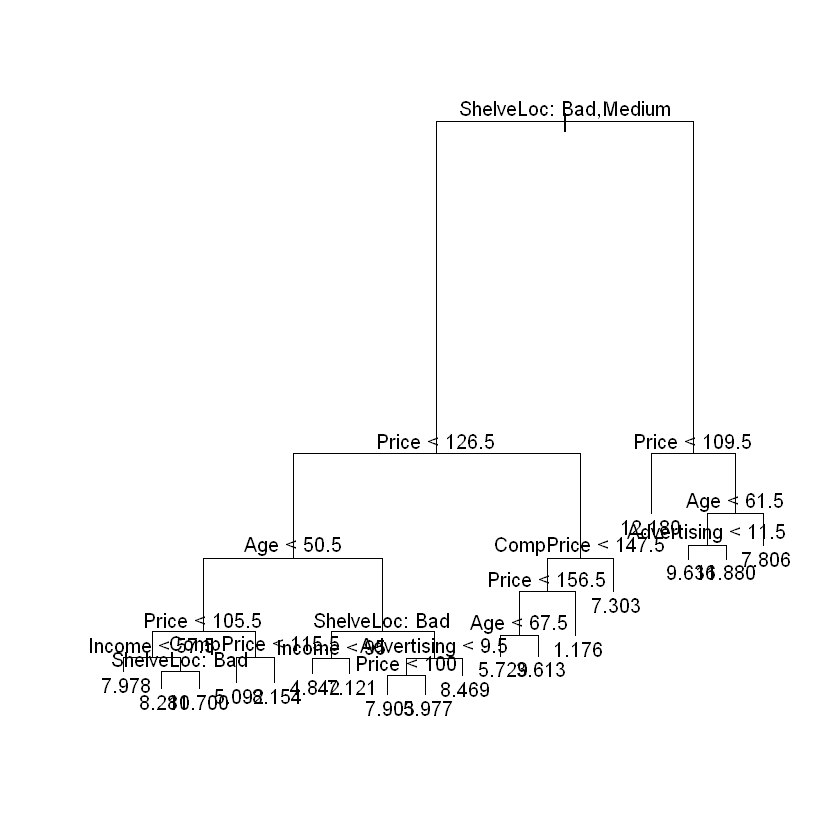

In [257]:
library(tree)

tree.carseats = tree(Sales~., X_train)
yhat.carseats = predict(tree.carseats, newdata=X_test)
MSE <- mean((yhat.carseats - y_test)^2)
MSE

plot(tree.carseats)
text(tree.carseats ,pretty =0)

### (c) 

Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

- In this case, reducing complexity via pruning raises MSE to 4.7

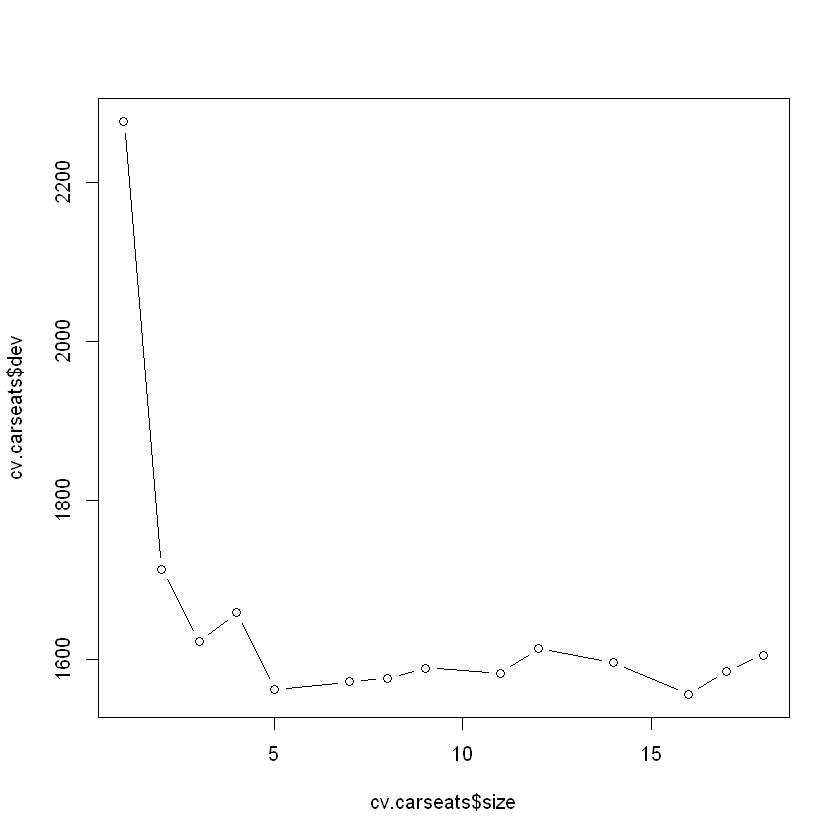

In [271]:
set.seed (3)
cv.carseats = cv.tree(tree.carseats )
plot(cv.carseats$size ,cv.carseats$dev ,type='b')

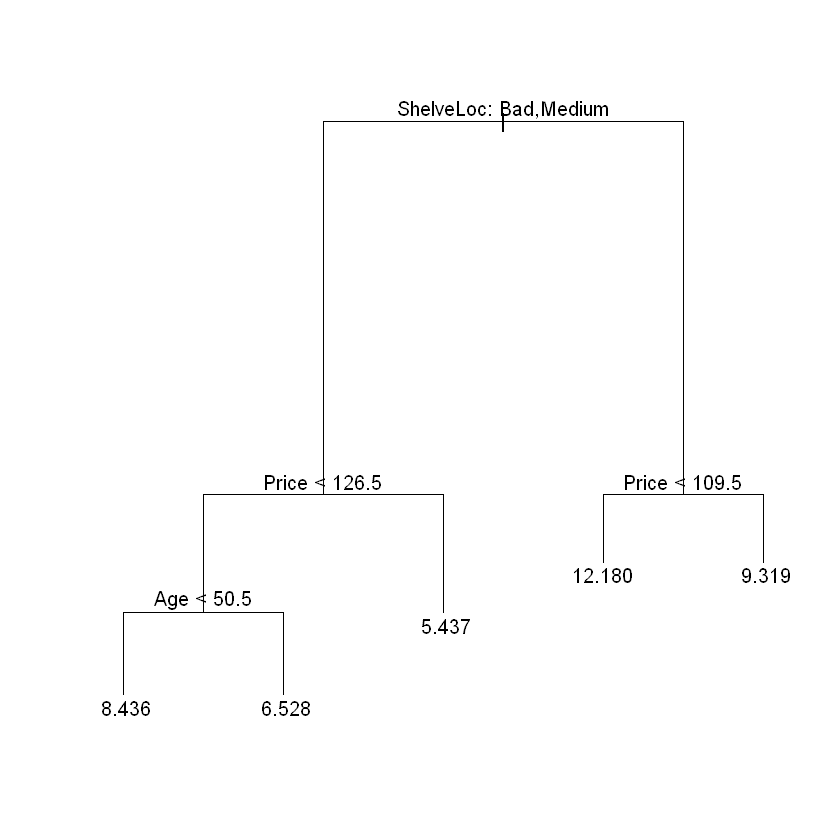

In [272]:
prune.carseats = prune.tree(tree.carseats, best=5)
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [273]:
library(glue)

In [274]:
yhat=predict(prune.carseats, newdata=X_test)

glue('MSE:  {mean((yhat-y_test)^2)}')

MSE:  4.7160992005164

### (d) 

Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the `importance()` function to determine
which variables are most important.

- MSE is ~2.3

In [306]:
# The argument mtry=13 indicates that all N predictors should be considered
# for each split of the tree—in other words, that bagging should be done.

bag.carseats = randomForest(Sales~., X_train, importance=TRUE, mtry=length(names(Carseats))-1)
bag.carseats


Call:
 randomForest(formula = Sales ~ ., data = X_train, importance = TRUE,      mtry = length(names(Carseats)) - 1) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.720361
                    % Var explained: 66.16

In [307]:
set.seed(456)
bag.yhat=predict(bag.carseats, newdata=X_test)
glue('MSE:  {mean((bag.yhat-y_test)^2)}')

MSE:  2.30716662598099

In [308]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,31.0385199,232.391615
Income,9.1886260,128.702201
Advertising,16.6570140,127.598156
Population,-2.4411584,74.484649
Price,60.2588084,605.606061
ShelveLoc,73.9653451,704.032052
Age,22.3731506,243.981151
Education,-0.5509030,54.849218
Urban,-0.9654085,9.719784
US,1.9669998,9.391051


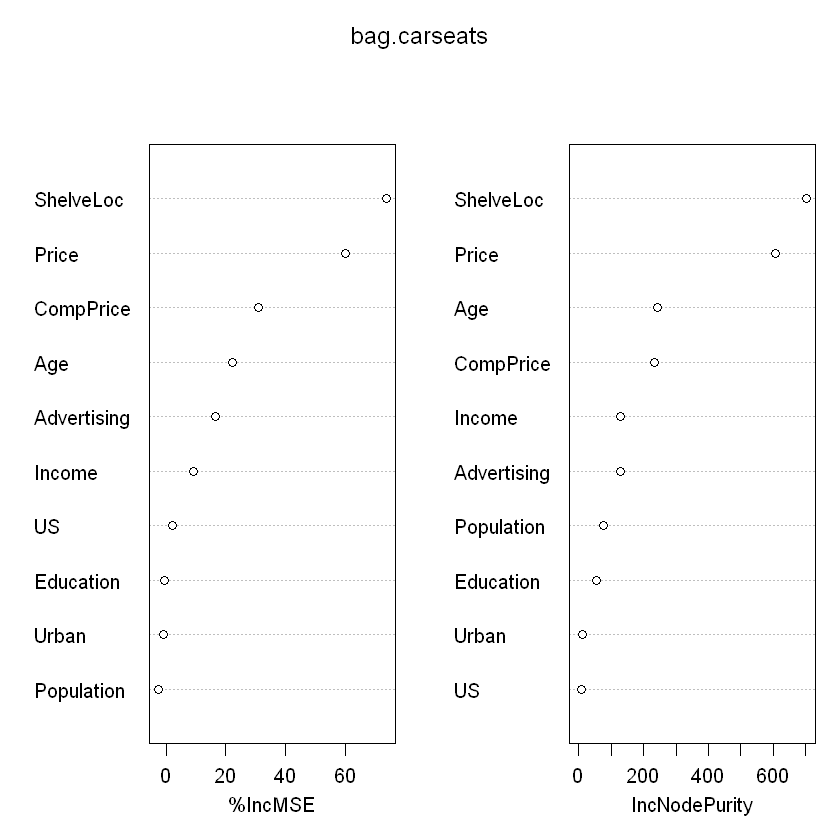

In [309]:
varImpPlot(bag.carseats)

### (e) 

Use random forests to analyze this data. What test MSE do you
obtain? Use the `importance()` function to determine which variables
aremost important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.

- MSE 2.54

In [310]:
rf.carseats = randomForest(Sales~., X_train, importance=TRUE)
rf.carseats


Call:
 randomForest(formula = Sales ~ ., data = X_train, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 3.120401
                    % Var explained: 61.19

In [311]:
set.seed(123)
rf.yhat=predict(rf.carseats, newdata=X_test)
glue('MSE:  {mean((rf.yhat-y_test)^2)}')

MSE:  2.54965813963631

In [314]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,15.1093727,206.42240
Income,3.3555986,173.89783
Advertising,10.2956849,153.59460
Population,-0.4343049,134.10322
Price,37.5275405,506.94383
ShelveLoc,50.5006501,550.29268
Age,15.4681358,255.46049
Education,2.4777830,97.28203
Urban,-1.2359067,20.01901
US,1.9396684,26.20185


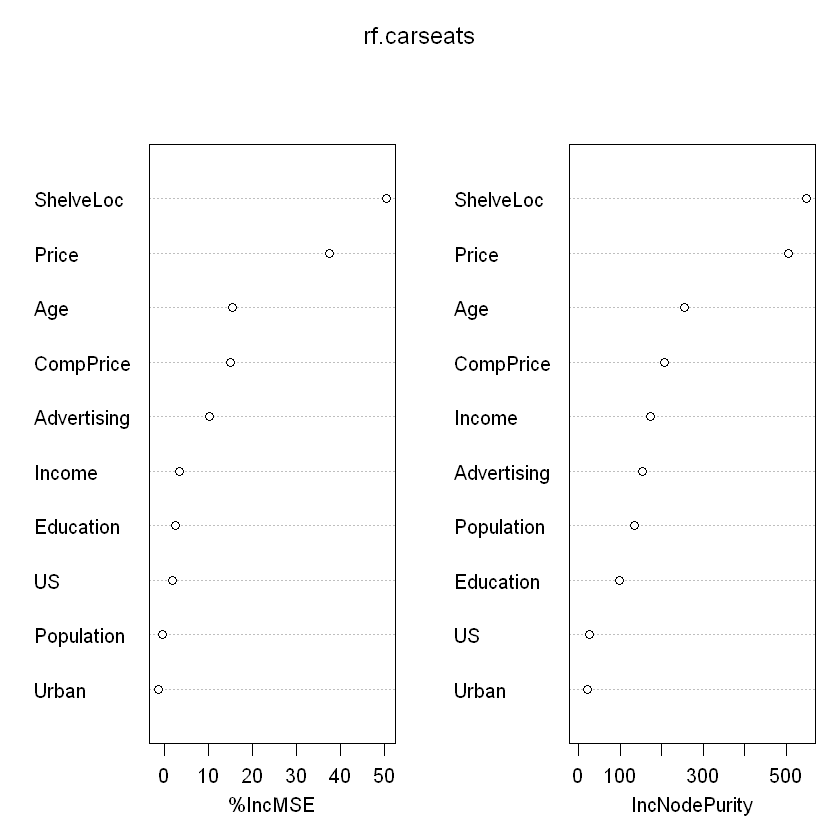

In [315]:
varImpPlot(rf.carseats)